In [34]:
import numpy as np
from HestonFunctions_copy import Heston_explicit_bf
import matplotlib.pyplot as plt

In [10]:
from scipy.optimize import brentq
from scipy.stats import norm

# Black-Scholes price of an option
def bs_price(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        price = (S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))
    else:
        price = (K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1))
    return price

# Implied volatility function
def implied_volatility(S, K, T, r, market_price, option_type='call'):
    def iv_objective(sigma):
        # This is the objective function: the difference between the market price and the BS model price
        return bs_price(S, K, T, r, sigma, option_type) - market_price

    # Initial guess for sigma
    sigma_guess = 0.2
    try:
        # Brent's method to find the root of the objective function
        implied_vol = brentq(iv_objective, a=1e-6, b=3) #x0=sigma_guess)
    except ValueError:
        # If the Brent method fails, it often means that no solution was found within the bounds
        # It could be due to market prices being outside no-arbitrage bounds, or other numerical issues
        implied_vol = np.nan

    return implied_vol

# Example usage for a call option:
# iv_call = implied_volatility(S=100, K=100, T=1, r=0.05, market_price=10, option_type='call')

# Example usage for a put option:
# iv_put = implied_volatility(S=100, K=100, T=1, r=0.05, market_price=5, option_type='put')


In [35]:
kappa=2
eta=0.2
sigma=0.3
rho=0.8
V0=1
r=0.03
T=1
dt=1/4000
S0=200
I=40
J=20
K=100

In [ ]:
option_prices, _ = Heston_explicit_bf(kappa, eta, sigma, rho, V0, r, T, dt, S0, I, J, K)  # Your function call here


In [38]:
option_prices.shape

(41, 21)

In [43]:
# Assuming you have the option prices matrix from the Heston model


# Calculate implied volatilities across the range of strikes and maturities
strikes = np.arange(80, 121, 1) # Your range of strikes
maturities = np.arange(0, 21, 1)  # Your range of maturities
S0 = 200  # Current stock price
r = 0.03  # Risk-free rate

# Initialize an empty matrix for the implied volatilities
iv_matrix = np.zeros_like(option_prices)

# Populate the implied volatility matrix
for i, strike in enumerate(strikes):
    for j, maturity in enumerate(maturities):
        market_price = option_prices[i, j]
        iv_matrix[i, j] = implied_volatility(S0, strike, maturity, r, market_price, option_type='call')


C:\Users\IshaG\AppData\Local\Temp\ipykernel_2904\2906690947.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))


In [25]:
type(option_prices)

numpy.ndarray

In [44]:
inner_lengths = [len(inner) for inner in option_prices]
if len(set(inner_lengths)) != 1:
    print("Inconsistent lengths found:", inner_lengths)

# Check the shapes of strikes and maturities
print("Strikes length:", len(strikes))
print("Maturities length:", len(maturities))

Strikes length: 41
Maturities length: 21


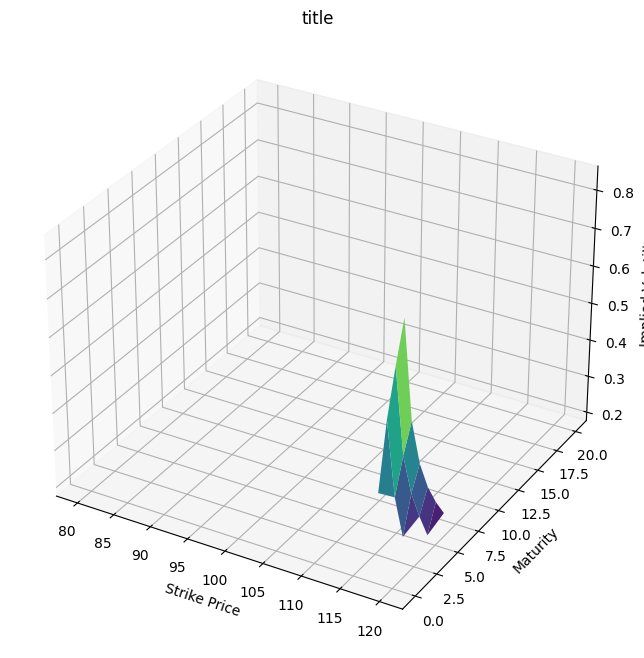

In [45]:
# plot the implied volatility surface

X, Y = np.meshgrid(strikes, maturities)
Z = iv_matrix.T  # Transpose the matrix to align with the meshgrid orientation

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot a 3D surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Add title and labels
ax.set_title("title")
ax.set_xlabel('Strike Price')
ax.set_ylabel('Maturity')
ax.set_zlabel('Implied Volatility')

# Add a color bar to show the scale of implied volatility
# fig.colorbar(surf, shrink=0.5, aspect=5)

# Show the plot
plt.show()

In [28]:
from scipy.optimize import newton
def ImpliedVolCall(S0, K, tau, r, Heston_price):
    def f(x):
        return bs_price(S0, K, tau, r, x) - Heston_price

    if f(-1) * f(1) > 0:
        return None

    # result = opt.root_scalar(f, bracket=[-1, 1], method='brentq')
    # return result.root

    initial_guess = 0.2
    try:
        iv = newton(f, initial_guess)
        return iv
    except RuntimeError:
        return np.nan